In [1]:
from ultralytics import YOLO
import cv2

# Load the pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # 'n' = nano version, fast & small

# Define the image path (use raw string to avoid backslash issues)
image_path = r"C:\Users\latur\Downloads\cute.webp"

# Run detection
results = model(image_path)[0]  # Single image, first result

# Load image with OpenCV
image = cv2.imread(image_path)

# Loop through detections
for r in results.boxes:
    cls = int(r.cls[0])                    # Class ID
    label = model.names[cls]               # Class name
    conf = float(r.conf[0])                # Confidence
    bbox = r.xyxy[0].tolist()              # Bounding box [x1, y1, x2, y2]

    # Draw rectangle and label
    x1, y1, x2, y2 = map(int, bbox)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, f"{label} {conf:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save or display the result
output_path = r"C:\Users\latur\Downloads\output_detected.jpg"
cv2.imwrite(output_path, image)
print(f"Detection complete! Output saved to:\n{output_path}")


image 1/1 C:\Users\latur\Downloads\cute.webp: 480x640 4 persons, 4 cats, 4 dogs, 181.2ms
Speed: 7.8ms preprocess, 181.2ms inference, 6.2ms postprocess per image at shape (1, 3, 480, 640)
Detection complete! Output saved to:
C:\Users\latur\Downloads\output_detected.jpg


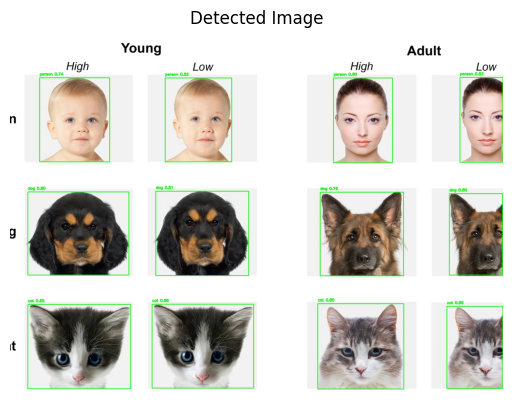

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(r"C:\Users\latur\Downloads\output_detected.jpg")
plt.imshow(img)
plt.axis('off')
plt.title("Detected Image")
plt.show()
